In [2]:
import cv2

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

## Function

In [ ]:
def getFromFile(file,info):
    cap = cv2.VideoCapture(file)
    ret, frame = cap.read()
    cap.release()
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    if(info):
        print(f'The shape of the image is {frame_rgb.shape}')
    return frame_rgb
def MaskImg(file,corners):
    image = getFromFile(file,0)
    mask = np.zeros(image.shape[:2], dtype=np.uint8)#CHIEDI
    mask_corners = np.array(corners)
    cv2.drawContours(mask, [mask_corners], -1, 255, -1)
#     plt.imshow(mask, cmap='gray')
    masked_image = cv2.bitwise_and(image,image,mask=mask)
    plt.imshow(masked_image)
    return masked_image
def getLimits(b,g,r,rangeWidth):
    arr = [[[b,g,r]]]
    color = np.uint8(arr)
    hsvColor = cv2.cvtColor(color, cv2.COLOR_BGR2HSV)
    lowerLimit = [hsvColor[0][0][0]-rangeWidth,40,40]
    upperLimit = [hsvColor[0][0][0]+rangeWidth,255,255]
    return [lowerLimit,upperLimit]

### prova cattura singolo frame

The video contains 185 frames


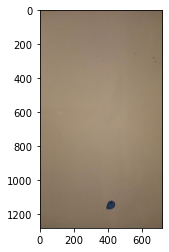

In [22]:
cap = cv2.VideoCapture("video1.mp4")
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(f'The video contains {n_frames} frames')

cap.set(cv2.CAP_PROP_POS_FRAMES, 184)
ret, frame = cap.read()
cap.release()
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame_rgb)

### applica la maschera su singolo frame

In [26]:
limits = getLimits(255,0,0,20)
lowerLimit = limits[0]
upperLimit = limits[1]

In [34]:
def MaskFrame(file,frameNum,corners):
    cap = cv2.VideoCapture(file)
    cap.set(cv2.CAP_PROP_POS_FRAMES, frameNum)
    ret, frame = cap.read()
    cap.release()
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    mask = np.zeros(frame_rgb.shape[:2], dtype=np.uint8)#CHIEDI
    mask_corners = np.array(corners)
    cv2.drawContours(mask, [mask_corners], -1, 255, -1)
#     plt.imshow(mask, cmap='gray')
    masked_image = cv2.bitwise_and(frame_rgb,frame_rgb,mask=mask)
    plt.imshow(masked_image)
    return masked_image

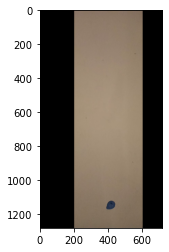

In [42]:
img=MaskFrame("video1.mp4",184,[[200, 0], [200, 1280], [600, 1280], [600, 0]])

In [43]:
hsv_image =  cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

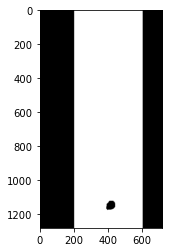

In [44]:
blue_regions = cv2.inRange(hsv_image, np.array(lowerLimit), np.array(upperLimit))#lower and upper limit are to be enclosed in an np array
plt.imshow(blue_regions, cmap='gray');

Centroid of green dot: (x, y) = (400.0, 639.5)


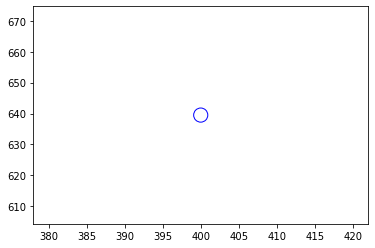

In [45]:
contours, _ = cv2.findContours(blue_regions, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)#CHIEDI
blue_dots_positions = []

for contour in contours:
#   print(f"area = {cv2.contourArea(contour)}")
  if cv2.contourArea(contour) > 100000: # Minimum contour area threshold
     M = cv2.moments(contour)
#      print(M)
     center_x = M["m10"] / M["m00"]
     center_y = M["m01"] / M["m00"]#CHIEDI
     print(f"Centroid of green dot: (x, y) = ({center_x:.1f}, {center_y:.1f})")
     plt.scatter(center_x, center_y, color='blue', marker='o', facecolor='none', s=200);#s is the size of the scattered contour
     blue_dots_positions.append([center_x, center_y])


### prova tracking video

Video written to trackedsmall.mp4


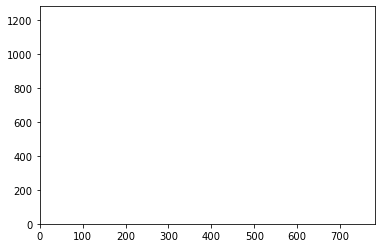

In [21]:
cap = cv2.VideoCapture("sfera grande.mp4")
corners = [[200, 0], [200, 1280], [500, 1280], [500, 0]]

frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

 # Define the codec and create VideoWriter object
    
outfilename = "tracked.mp4"   

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(outfilename, fourcc, fps, (frame_width, frame_height))

# print(f'Recording video for {record_duration_s} seconds with resolution {frame_width}x{frame_height}')

plt.axis([0,780,0,1280])

for frame_index in range(n_frames):
    ret, frame_rgb = cap.read()
#     frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    mask = np.zeros(frame_rgb.shape[:2], dtype=np.uint8)#CHIEDI
    mask_corners = np.array(corners)
    cv2.drawContours(mask, [mask_corners], -1, 255, -1)
#     plt.imshow(mask, cmap='gray')
    masked_image = cv2.bitwise_and(frame_rgb,frame_rgb,mask=mask)
    
    hsv_image =  cv2.cvtColor(masked_image, cv2.COLOR_BGR2HSV)
    
    blue_regions = cv2.inRange(hsv_image, np.array(lowerLimit), np.array(upperLimit))#lower and upper limit are to be enclosed in an np array
#     fig = plt.imshow(blue_regions, cmap='gray')

#     out.write(blue_regions)
    
    contours, _ = cv2.findContours(blue_regions, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)#CHIEDI
    blue_dots_positions = []

    for contour in contours:
#       print(f"area = {cv2.contourArea(contour)}")
      if cv2.contourArea(contour) > 100: # Minimum contour area threshold
        M = cv2.moments(contour)
#         print(M)
        center_x = M["m10"] / M["m00"]
        center_y = M["m01"] / M["m00"]#CHIEDI
        print(f"Centroid of dot: (x, y) = ({center_x:.1f}, {center_y:.1f})")
#         plt.xscale()
        plt.scatter(center_x, center_y, color='blue', marker='o', facecolor='none', s=200);#s is the size of the scattered contour
        blue_dots_positions.append([center_x, center_y])
        cv2.circle(frame_rgb,(int(center_x),int(center_y)),30,(0,0,0),5)
    out.write(frame_rgb)
# plt.savefig("testGRANDE100.png")
cap.release()
out.release()
print(f'Video written to {outfilename}')


The video contains 756 frames


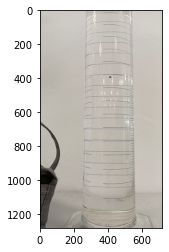

In [16]:
ccap = cv2.VideoCapture("sfera piccola.mp4")
n_frames = int(ccap.get(cv2.CAP_PROP_FRAME_COUNT))
print(f'The video contains {n_frames} frames')

ccap.set(cv2.CAP_PROP_POS_FRAMES, 400)
ret, frame = ccap.read()
ccap.release()
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame_rgb)
plt.savefig("colorpick.png")

In [22]:
limits = getLimits(52,58,62,18)
lowerLimit = limits[0]
upperLimit = limits[1]
print(limits)

[[0, 40, 40], [36, 255, 255]]


In [9]:
def frameCenter(frame,r,g,b,width,area):
    lims=getLimits(b,g,r,width)
    lowerLimit = lims[0]
    upperLimit = lims[1]
    hsv_image =  cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    blue_regions = cv2.inRange(hsv_image, np.array(lowerLimit), np.array(upperLimit))#lower and upper limit are to be enclosed in an np array
    
    contours, _ = cv2.findContours(blue_regions, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)#CHIEDI
#     blue_dots_positions = []

    for contour in contours:
#       print(f"area = {cv2.contourArea(contour)}")
      if cv2.contourArea(contour) > area: # Minimum contour area threshold
        M = cv2.moments(contour)
        center_x = M["m10"] / M["m00"]
        center_y = M["m01"] / M["m00"]#CHIEDI
        print(f"Centroid of dot: (x, y) = ({center_x:.1f}, {center_y:.1f})")
#         plt.scatter(center_x, center_y, color='blue', marker='o', facecolor='none', s=200);#s is the size of the scattered contour
#         blue_dots_positions.append([center_x, center_y])
        return [center_x,center_y]

In [14]:
cap = cv2.VideoCapture("sfera grande.mp4")
cap.set(cv2.CAP_PROP_POS_FRAMES, 190)
ret, frame = cap.read()
cap.release()
arr = frameCenter(frame,52,58,62,18,100)

Centroid of dot: (x, y) = (341.6, 959.7)


In [29]:
def track(r,g,b,width,file,outfilename,corners):
    cap = cv2.VideoCapture(file)
    n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    
# outfilename = "tracked.mp4"   

    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(outfilename, fourcc, fps, (frame_width, frame_height))

    plt.axis([0,780,0,1280])

    for frame_index in range(n_frames):
        ret, frame_rgb = cap.read()

        mask = np.zeros(frame_rgb.shape[:2], dtype=np.uint8)#CHIEDI
        mask_corners = np.array(corners)
        cv2.drawContours(mask, [mask_corners], -1, 255, -1)
        masked_image = cv2.bitwise_and(frame_rgb,frame_rgb,mask=mask)

        hsv_image =  cv2.cvtColor(masked_image, cv2.COLOR_BGR2HSV)

        blue_regions = cv2.inRange(hsv_image, np.array(lowerLimit), np.array(upperLimit))#lower and upper limit are to be enclosed in an np array

        contours, _ = cv2.findContours(blue_regions, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)#CHIEDI
        blue_dots_positions = []

        for contour in contours:
    #       print(f"area = {cv2.contourArea(contour)}")
          if cv2.contourArea(contour) > 100: # Minimum contour area threshold
            M = cv2.moments(contour)
    #         print(M)
            center_x = M["m10"] / M["m00"]
            center_y = M["m01"] / M["m00"]#CHIEDI
            print(f"Centroid of dot: (x, y) = ({center_x:.1f}, {center_y:.1f})")
    
            plt.scatter(center_x, center_y, color='blue', marker='o', facecolor='none', s=200);#s is the size of the scattered contour
            blue_dots_positions.append([center_x, center_y])
            cv2.circle(frame_rgb,(int(center_x),int(center_y)),30,(0,0,0),5)
        out.write(frame_rgb)
        
    cap.release()
    out.release()
    print(f'Video written to {outfilename}')


Centroid of dot: (x, y) = (342.9, 188.4)
Centroid of dot: (x, y) = (344.5, 302.7)
Centroid of dot: (x, y) = (343.7, 330.9)
Centroid of dot: (x, y) = (344.1, 359.1)
Centroid of dot: (x, y) = (343.4, 386.8)
Centroid of dot: (x, y) = (340.0, 439.7)
Centroid of dot: (x, y) = (338.7, 464.7)
Centroid of dot: (x, y) = (339.4, 487.5)
Centroid of dot: (x, y) = (338.3, 560.4)
Centroid of dot: (x, y) = (340.6, 583.2)
Centroid of dot: (x, y) = (340.3, 606.8)
Centroid of dot: (x, y) = (339.8, 654.2)
Centroid of dot: (x, y) = (339.9, 677.3)
Centroid of dot: (x, y) = (340.0, 702.0)
Centroid of dot: (x, y) = (339.5, 725.4)
Centroid of dot: (x, y) = (337.0, 748.3)
Centroid of dot: (x, y) = (339.1, 771.1)
Centroid of dot: (x, y) = (337.6, 796.1)
Centroid of dot: (x, y) = (337.8, 819.6)
Centroid of dot: (x, y) = (335.3, 841.5)
Centroid of dot: (x, y) = (337.0, 864.9)
Centroid of dot: (x, y) = (336.2, 889.4)
Centroid of dot: (x, y) = (337.2, 912.7)
Centroid of dot: (x, y) = (337.0, 935.4)
Centroid of dot:

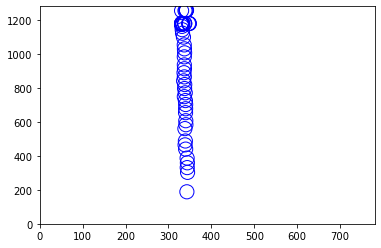

In [30]:
track(52,58,62,18,"sfera grande.mp4","prova.mp4",[[200, 0], [200, 1280], [500, 1280], [500, 0]])

In [31]:
def getFrame(file,num):
    cap = cv2.VideoCapture(file)
    n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f'The video contains {n_frames} frames')
    if(num>=n_frames):
        print("FRAME OUT OF INDEX")
        return -1
    else:
        cap.set(cv2.CAP_PROP_POS_FRAMES, num)
        ret, frame = cap.read()
        cap.release()
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        return frame_rgb

In [36]:
fr = getFrame("sfera grande.mp4",200)

The video contains 192 frames
FRAME OUT OF INDEX


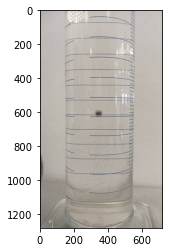

In [35]:
plt.imshow(fr)